<a href="https://colab.research.google.com/github/riz330/Machine-Learning-Ravet/blob/main/Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv")
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [5]:
df.duplicated().sum()

0

In [6]:
X=df.drop(columns=["Weather Type"])

In [7]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [8]:
Y=df[["Weather Type"]]

In [9]:
Y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


<Axes: xlabel='Weather Type'>

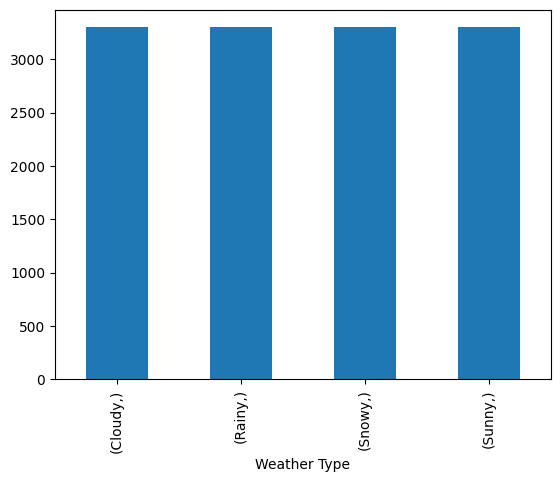

In [10]:
Y.value_counts().plot(kind="bar")

In [13]:
cat=list(X.columns[X.dtypes=="object"])
con=list(X.columns[X.dtypes!="object"])

In [14]:
cat

['Cloud Cover', 'Season', 'Location']

In [15]:
con

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [36]:
numpipe=make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [37]:
catpipe=make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False)
)



In [38]:
pre=ColumnTransformer([
    ("num",numpipe,con),
    ("cat",catpipe,cat)
]).set_output(transform="pandas")

In [39]:
X_pre=pre.fit_transform(X)

In [40]:
X_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [42]:
xtrain.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
10799,-0.352450,-1.718913,-0.844213,1.106753,-1.941167,1.035729,0.010999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8985,-0.007338,-0.579931,-0.048086,-0.865366,-0.113928,-0.260799,0.455922,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5082,3.558818,0.311445,-1.350840,1.106753,0.347654,2.332257,1.049153,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9569,0.452811,0.014320,0.458541,-0.395814,0.098717,-0.520104,0.604230,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9383,-0.122375,0.410487,1.327043,1.419788,0.180711,-0.779410,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [43]:
xtest.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
11567,0.050181,1.153301,1.978420,1.451092,-0.001288,1.813646,-0.433923,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
12231,-1.732897,1.747552,1.471794,1.670216,-0.421201,1.035729,-1.472077,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
854,0.280255,-1.372266,-0.988963,-1.334918,0.388516,0.776424,0.455922,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
12047,0.510330,1.252343,1.254668,-0.020172,0.210820,-1.038715,-0.730539,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1722,-1.617860,0.113362,0.458541,0.511987,-0.284097,-1.038715,-0.137308,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [44]:
ytrain.head()

,Weather Type
10799,Snowy
8985,Cloudy
5082,Sunny
9569,Cloudy
9383,Rainy


In [45]:
ytest.head()

,Weather Type
11567,Cloudy
12231,Snowy
854,Sunny
12047,Rainy
1722,Snowy


In [46]:
xtrain.shape

(10560, 18)

In [47]:
xtest.shape

(2640, 18)

In [48]:
ytrain.shape

(10560, 1)

In [51]:
ytest.shape

(2640, 1)

In [53]:
ohe=OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform="pandas")

In [54]:
ytrain_pre=ohe.fit_transform(ytrain)
ytest_pre=ohe.fit_transform(ytest)

In [56]:
ytrain_pre.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
10799,0.0,0.0,1.0,0.0
8985,1.0,0.0,0.0,0.0
5082,0.0,0.0,0.0,1.0
9569,1.0,0.0,0.0,0.0
9383,0.0,1.0,0.0,0.0


In [57]:
ytest_pre.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
11567,1.0,0.0,0.0,0.0
12231,0.0,0.0,1.0,0.0
854,0.0,0.0,0.0,1.0
12047,0.0,1.0,0.0,0.0
1722,0.0,0.0,1.0,0.0


In [59]:
xtrain.shape

(10560, 18)

In [58]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [60]:
#initialization
model=Sequential()
# Add Input Layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add Dense Layer
model.add(Dense(32,activation="relu"))
# Add Dropout layer
model.add(Dropout(rate=0.3))

model.add(Dense(16,activation="relu"))

model.add(Dropout(rate=0.2))
# for multiclass classification softmax activation

model.add(Dense(ytrain_pre.shape[1],activation="softmax"))

In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,204 (4.70 KB)

 Trainable params: 1,204 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [63]:
es=EarlyStopping(patience=10)

In [64]:
hist=model.fit(xtrain,ytrain_pre,epochs=200,validation_split=0.2,callbacks=[es])

Epoch 1/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4735 - loss: 1.1908 - val_accuracy: 0.8589 - val_loss: 0.5441
Epoch 2/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7918 - loss: 0.6305 - val_accuracy: 0.8849 - val_loss: 0.3851
Epoch 3/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8429 - loss: 0.4777 - val_accuracy: 0.8902 - val_loss: 0.3201
Epoch 4/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8564 - loss: 0.4211 - val_accuracy: 0.8949 - val_loss: 0.2917
Epoch 5/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8593 - loss: 0.4095 - val_accuracy: 0.8930 - val_loss: 0.2768
Epoch 6/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8730 - loss: 0.3628 - val_accuracy: 0.8944 - val_loss: 0.2634
Epoch 7/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8797 - loss: 0.3347 - val_accuracy: 0.9015 - val_loss: 0.2514
Epoch 8/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8844 - loss: 0.3248 - val_accu

Learning Curve

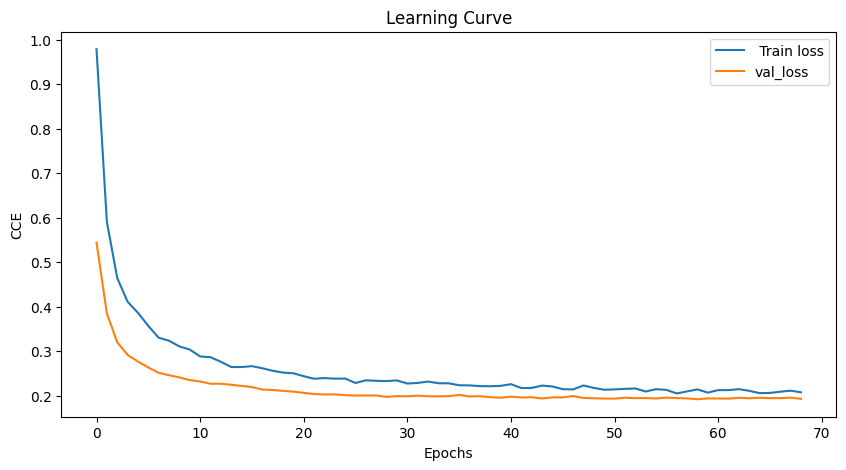

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history["loss"],label=" Train loss")
plt.plot(hist.history["val_loss"],label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("CCE")
plt.title("Learning Curve")
plt.legend()
plt.show()

Modal Evaluation

In [66]:
model.evaluate(xtest,ytest_pre)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9152 - loss: 0.1740


[0.19382309913635254, 0.904924213886261]

In [67]:
model.evaluate(xtrain,ytrain_pre)

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9163 - loss: 0.1761


[0.17777511477470398, 0.9154356122016907]

In [68]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [73]:
yprob_train[0:5]

array([[2.2168873e-01, 2.7210954e-01, 2.4467136e-01, 2.6153034e-01],
       [9.9987507e-01, 2.9405353e-05, 6.0103016e-06, 8.9503505e-05],
       [1.6920623e-14, 6.5104280e-23, 1.4868558e-15, 1.0000000e+00],
       [9.9965084e-01, 2.2964431e-04, 1.5969614e-05, 1.0354306e-04],
       [5.6201476e-03, 9.9432981e-01, 9.1890279e-06, 4.0721523e-05]],
      dtype=float32)

In [75]:
ytrain_pre.columns

Index(['Weather Type_Cloudy', 'Weather Type_Rainy', 'Weather Type_Snowy',
       'Weather Type_Sunny'],
      dtype='object')

In [78]:
classes=[i.split("_")[1] for i in ytrain_pre.columns]

In [79]:
classes

['Cloudy', 'Rainy', 'Snowy', 'Sunny']

In [72]:
yprob_test[0:5]

array([[5.14704406e-01, 4.72937346e-01, 4.10721987e-04, 1.19475182e-02],
       [3.85208575e-13, 5.57884583e-09, 1.00000000e+00, 6.27560287e-12],
       [3.13265954e-18, 5.91869433e-27, 1.89504597e-17, 1.00000000e+00],
       [5.33584412e-03, 9.94608760e-01, 1.38039995e-05, 4.16036928e-05],
       [5.57660917e-10, 4.92797696e-08, 1.00000000e+00, 3.11610543e-10]],
      dtype=float32)

In [80]:
import numpy as np
yprob_index=np.argmax(yprob_train,axis=1)

In [81]:
yprob_index

array([1, 0, 3, ..., 1, 3, 0])

In [82]:
ypred_train=[classes[i] for i in yprob_index]

In [84]:
ypred_train[0:5]

['Rainy', 'Cloudy', 'Sunny', 'Cloudy', 'Rainy']

In [85]:
ytrain.head()

,Weather Type
10799,Snowy
8985,Cloudy
5082,Sunny
9569,Cloudy
9383,Rainy


In [89]:
def predictive_results(model,x):
  yprob=model.predict(x)
  yprob_index=np.argmax(yprob,axis=1)
  ypred=[classes[i] for i in yprob_index]
  return ypred,yprob

In [90]:
ypred_test,yprob_test=predictive_results(model,xtest)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


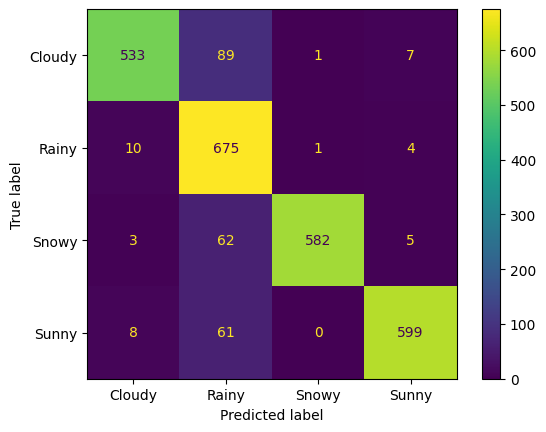

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

      Cloudy       0.96      0.85      0.90       630
       Rainy       0.76      0.98      0.86       690
       Snowy       1.00      0.89      0.94       652
       Sunny       0.97      0.90      0.93       668

    accuracy                           0.90      2640
   macro avg       0.92      0.90      0.91      2640
weighted avg       0.92      0.90      0.91      2640



In [93]:
xnew=pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv")

In [94]:
xnew_pre=pre.transform(xnew)

In [95]:
xnew_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-1.100192,-0.035201,0.892792,0.386773,-0.561530,-1.038715,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,5.054302,1.896115,0.748042,0.918933,0.246574,1.813646,0.455922,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.007338,0.360966,0.386166,-0.583634,0.307330,-0.001493,0.752538,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.165218,1.499948,1.254668,0.136346,0.184743,-1.038715,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.797923,-2.164601,-0.265211,-1.491435,0.482338,0.517118,-0.137308,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [96]:
preds,prob=predictive_results(model,xnew_pre)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [98]:
preds[0:5]

['Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny']

In [100]:
prob[0:5]

array([[2.0242259e-08, 4.8696156e-06, 9.9999499e-01, 8.4939103e-08],
       [8.3773710e-02, 1.0881390e-03, 2.2240286e-03, 9.1291410e-01],
       [9.9512768e-01, 3.0800728e-03, 1.4765847e-04, 1.6444979e-03],
       [5.1186224e-03, 9.9470204e-01, 8.4144369e-05, 9.5192969e-05],
       [3.8255929e-04, 2.2683034e-06, 1.6752751e-04, 9.9944764e-01]],
      dtype=float32)

In [101]:
xnew["Weather Type"]=preds

In [102]:
xnew[classes]=prob

In [104]:
xnew=xnew.round(4)

In [105]:
xnew

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Cloudy,Rainy,Snowy,Sunny
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy,0.0000,0.0000,1.0000,0.0000
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny,0.0838,0.0011,0.0022,0.9129
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy,0.9951,0.0031,0.0001,0.0016
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy,0.0051,0.9947,0.0001,0.0001
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny,0.0004,0.0000,0.0002,0.9994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27,59,9.5,41.0,overcast,1001.39,4,Spring,8.0,mountain,Cloudy,0.9912,0.0061,0.0004,0.0023
96,73,82,47.0,107.0,overcast,1002.73,0,Winter,0.5,mountain,Rainy,0.0404,0.9595,0.0000,0.0001
97,2,60,3.0,70.0,overcast,994.19,0,Winter,2.0,mountain,Snowy,0.0000,0.0000,1.0000,0.0000
98,33,44,1.5,11.0,clear,1011.95,7,Summer,8.5,inland,Sunny,0.0000,0.0000,0.0000,1.0000


In [106]:
xnew["Weather Type"].value_counts()

,count
Weather Type,
Rainy,36
Snowy,26
Cloudy,20
Sunny,18


In [107]:
xnew.to_csv("weather_predictions.csv",index=False)

In [108]:
model.save("weather_model.keras")